In [4]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from scipy import signal

from adversarial_autoencoder import Decoder, Encoder

In [5]:
bkp_folder = f"../../bkp/william/generative_models"
conditions = [x[0].split("/")[-1] for x in os.walk(bkp_folder)][1:]

n = 10000

df_list = []

for cond in conditions:
    folder = f"{bkp_folder}/{cond}"
    encoder = Encoder.load(folder=folder)
    decoder = Decoder.load(folder=folder)
    z = torch.randn((n // 2, encoder.latent_dim))
    samples = decoder(z).detach().numpy()

    df_ = pd.DataFrame(samples)
    df_.insert(0, 'label', cond)

    df_list.append(df_)

df = pd.concat(df_list, axis=0, ignore_index=True, sort=False)
df

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,standing,0.387686,0.327630,0.391960,0.384782,0.288266,0.342052,0.365377,0.361618,0.467837,...,-0.457114,-0.521838,-0.644748,-0.434182,-0.532048,-0.587681,-0.606196,-0.526304,-0.510162,-0.610150
1,standing,0.995848,0.997785,0.997479,0.996461,0.995921,0.997327,0.996898,0.998524,0.992507,...,-0.909660,-0.929108,-0.878417,-0.892871,-0.896237,-0.858993,-0.886934,-0.892174,-0.915677,-0.907498
2,standing,0.031576,0.144792,0.077443,0.140948,-0.161964,-0.153862,0.132160,0.464998,0.237517,...,-0.871071,-0.912565,-0.890667,-0.925767,-0.908899,-0.917983,-0.903214,-0.893784,-0.900596,-0.878220
3,standing,0.469648,0.501727,0.512472,0.453240,0.486364,0.463267,0.458665,0.623302,0.319274,...,-0.789713,-0.827737,-0.726961,-0.869145,-0.860664,-0.869551,-0.848150,-0.864329,-0.831736,-0.855252
4,standing,-0.387566,-0.363723,-0.251059,-0.266155,-0.385921,-0.404342,-0.371417,-0.493408,-0.286025,...,-0.760233,-0.852774,-0.683012,-0.745780,-0.769741,-0.682521,-0.734990,-0.630377,-0.640149,-0.585974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sitting,-0.569481,-0.625594,-0.586356,-0.584547,-0.495718,-0.665952,-0.637912,-0.698185,-0.706934,...,-0.630901,-0.756288,-0.830096,-0.817517,-0.815201,-0.797049,-0.813163,-0.821125,-0.753585,-0.781158
9996,sitting,-0.855518,-0.860729,-0.914043,-0.902930,-0.875731,-0.901513,-0.893131,-0.865941,-0.841840,...,0.529864,0.126869,0.090858,0.747646,0.678031,0.808386,0.813631,0.706485,0.807828,0.782774
9997,sitting,-0.520200,-0.590591,-0.587347,-0.508186,-0.684743,-0.540527,-0.553547,-0.666466,-0.576601,...,0.297688,0.366758,0.003979,-0.399072,-0.391960,-0.205846,-0.184878,-0.219575,-0.309349,-0.328530
9998,sitting,-0.458485,-0.401355,-0.435058,-0.460019,-0.406955,-0.475094,-0.583490,-0.463971,-0.542396,...,0.512775,0.467446,0.440520,0.380020,0.373473,0.374465,0.339507,0.306270,0.369961,0.298837


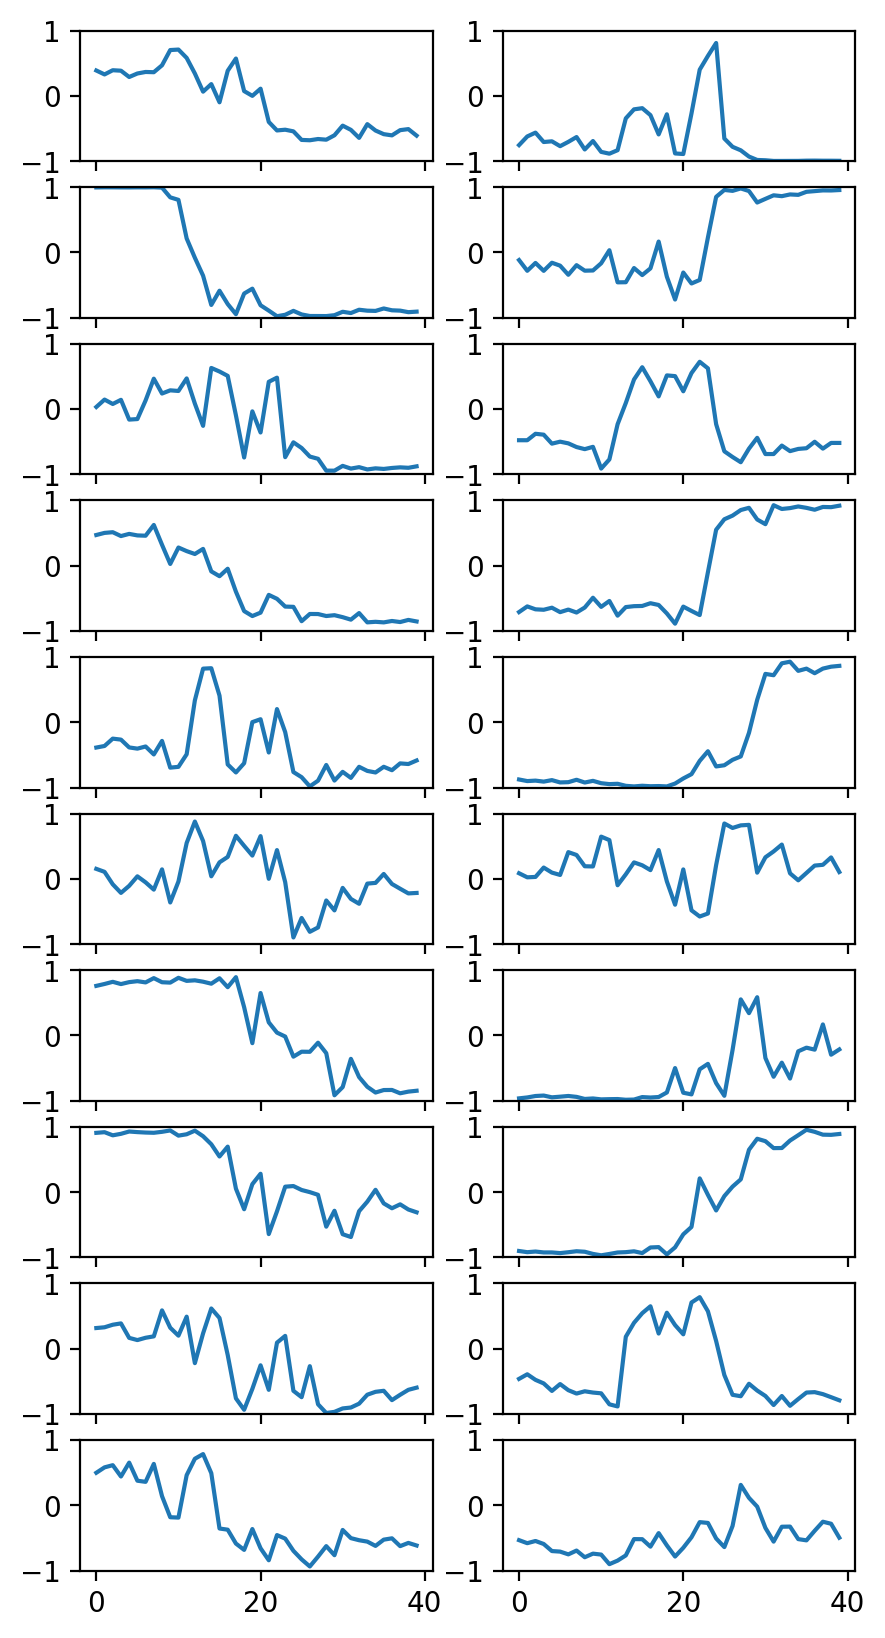

In [6]:
n_sample = 10
fig, axes = plt.subplots(nrows=n_sample, ncols=2, figsize=(5, 10), sharex=True)
for i in range(n_sample):
    ax = axes[i, 0]
    x = df[df.label == "standing"].iloc[i, 1:]
    ax.plot(x)
    ax.set_ylim(-1, 1)
    
    ax = axes[i, 1]
    x = df[df.label == "sitting"].iloc[i, 1:]
    ax.plot(x)
    ax.set_ylim(-1, 1)
plt.show()